# Datos anteriores

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

# Definiendo visualizaciones

## Preguntas
Después de la etapa de exploración de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. Así, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### Ventas
1. ¿Cuáles fueron los métodos de pago más utilizados en 2023?
2. ¿Cuál fue la facturación por categoría en 2023?
3. ¿Cómo fueron las ventas a lo largo de los meses en 2023?
4. ¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?

### Perfil del cliente
5. ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?
6. ¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?
7. ¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?

## Prompts
### Pregunta 1: ¿Cuáles fueron los métodos de pago más utilizados en el 2023?
**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cuáles métodos de pago fueron los más utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuación, deseamos crear una visualización que muestre la cantidad de esos métodos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

**Respuesta**

Perfecto. A continuación te muestro cómo:

1. Crear una **tabla resumen** llamada `metodos_de_pago` con el recuento de cada método de pago.
2. Construir una **visualización de barras** usando `matplotlib` y `seaborn` para mostrar la cantidad de veces que se utilizó cada uno.

Aquí tienes el código completo:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# 2. Visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

plt.title('Cantidad de Compras por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

### 🔍 Explicación:

* `value_counts()` cuenta la frecuencia de cada método de pago.
* `seaborn.barplot()` se usa para graficar los resultados con estilo limpio.
* El gráfico te ayudará a identificar de forma clara cuál método es más popular entre los clientes.

¿Quieres una versión alternativa en gráfico de torta (pie chart) o continuar con otro análisis?



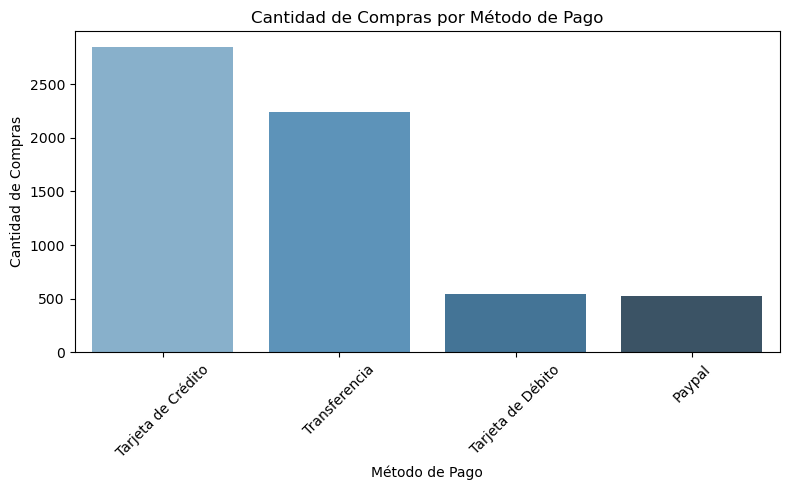

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", palette="Blues_d")

plt.title("Cantidad de Compras por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()